# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## **Environment Setup**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Metrics
import sklearn.metrics as metrics

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# # To supress warnings
# import warnings
# warnings.filterwarnings("ignore")

## **Data Ingestion**

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT_ML_Projects/Lead_Conversion_Prediction/data/ExtraaLearn.csv')

## **Exploratory Data Analysis (EDA)**

In [8]:
data.shape

(4612, 15)

In [9]:
data.head(3)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0


In [10]:
data.tail(3)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [15]:
data.drop(columns='ID', inplace=True)
data.head(2)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0


In [16]:
cols_to_display = list(data.describe(include=["object"]).columns)
cols_to_display += ["status"]

for i in cols_to_display:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in current_occupation are :
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
**************************************************
Unique values in first_interaction are :
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
**************************************************
Unique values in profile_completed are :
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
**************************************************
Unique values in last_activity are :
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
**************************************************
Unique values in print_media_type1 are :
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
**************************************************
Unique values in print_media_type2 are :
print_media_type2
No     4379
Yes     23

**Observations:**
- 4,612 leads * 14 predictors (after dropping 'ID')
- No missing values
- No duplicate values
- 9 object type features and 5 numerical type features
- Median 'age' is pretty high at 51 (range [18, 63])
- 'website_visits', 'time_spent_on_website', and 'page_views_per_visit'  appear to be right skewed
- Most features have imbalanced categories

## Exploratory Data Analysis (EDA)

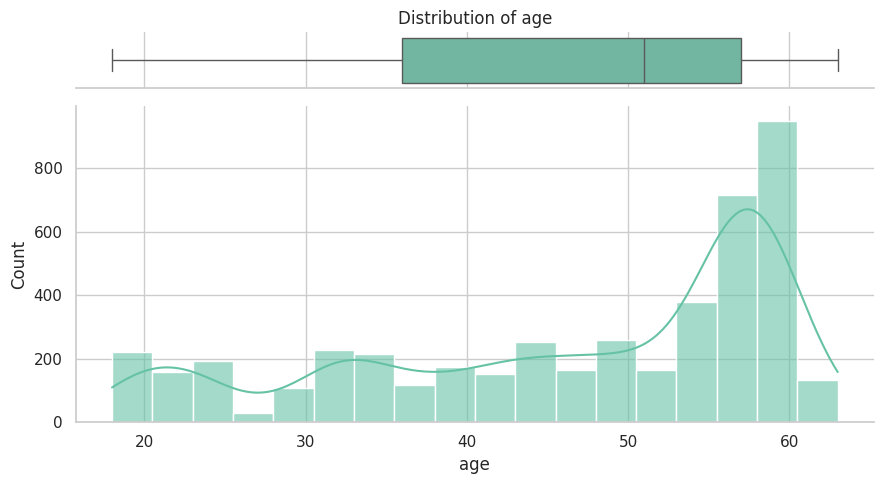

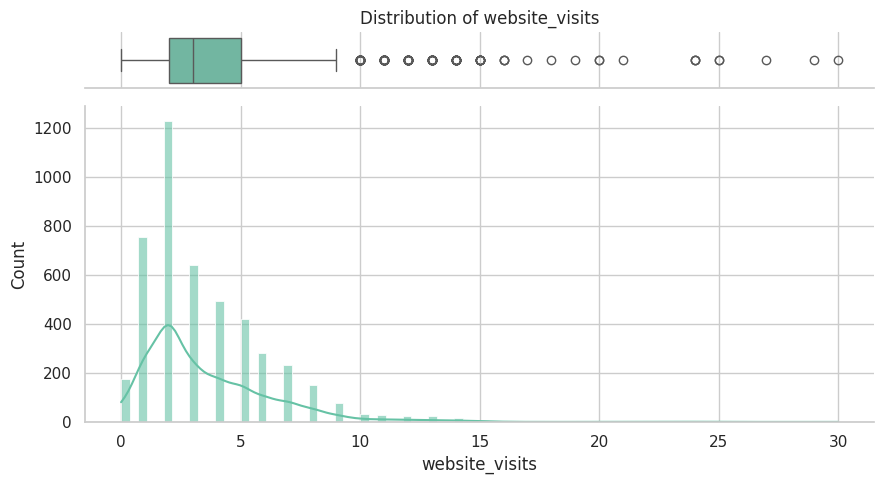

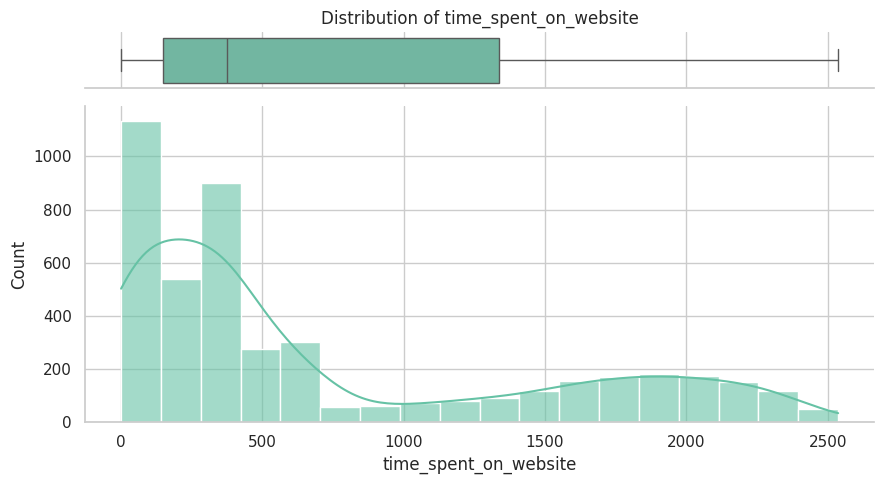

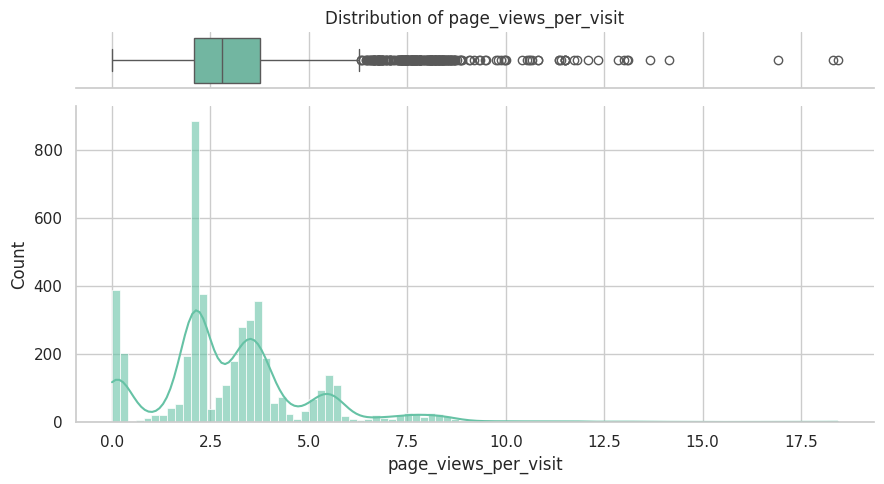

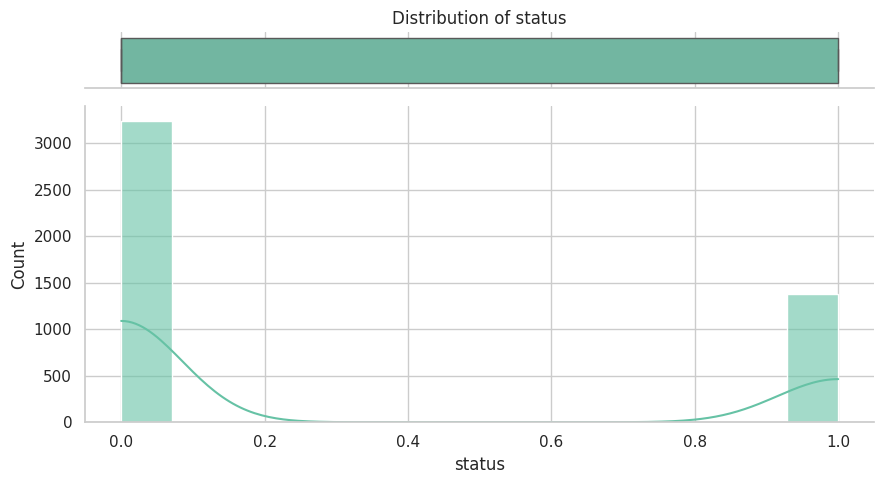

In [17]:
# Use a clean, light grid style and hide top/right borders for readability
sns.set_theme(
    style="whitegrid",
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False
    }
)

def dist_plot(df, col):
    # Create a compact box+hist layout to see both summary stats and full distribution
    fig, (ax_box, ax_hist) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},  # smaller boxplot, larger histogram
        figsize=(9, 5),
    )

    # Pick one consistent color so all plots look cohesive
    palette_color = sns.color_palette("Set2")[0]

    # Top: boxplot highlights outliers and median at a glance
    sns.boxplot(
        x=df[col],
        ax=ax_box,
        color=palette_color,
        linewidth=1
    )
    # Bottom: histogram + KDE shows the full shape of the data
    sns.histplot(
        x=df[col],
        kde=True,
        ax=ax_hist,
        color=palette_color,
        alpha=0.6
    )

    # Tidy up labels and titles
    ax_box.set(
        xlabel="",
        title=f"Distribution of {col}"
    )
    ax_hist.set(xlabel=col)

    # Remove leftover spines for a cleaner look
    sns.despine(ax=ax_box, left=True)
    sns.despine(ax=ax_hist)

    plt.tight_layout()  # ensure nothing overlaps
    plt.show()

# Apply to every numeric column to audit distributions and catch outliers
for feature in data.select_dtypes(include="number").columns:
    dist_plot(data, feature)


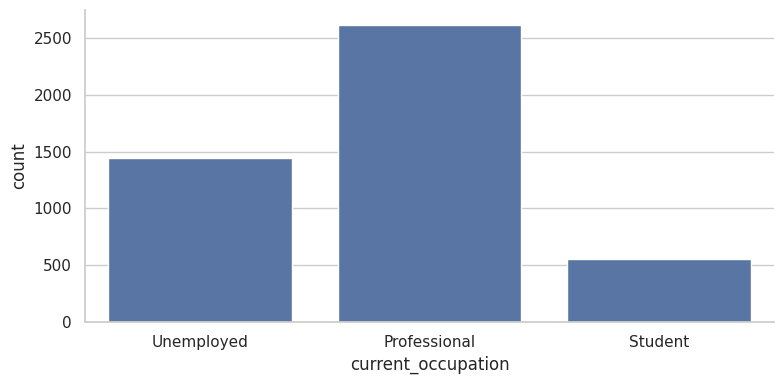

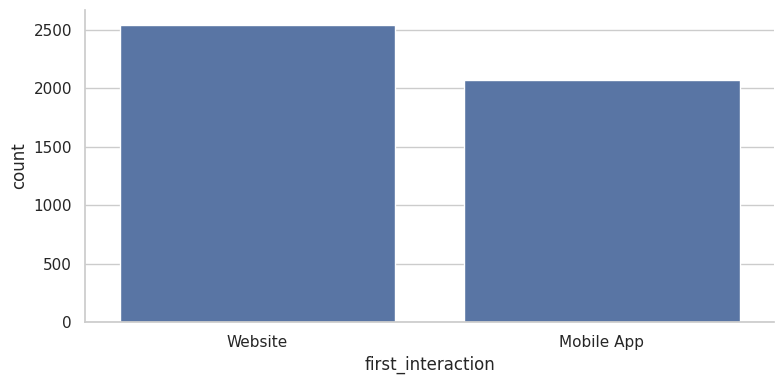

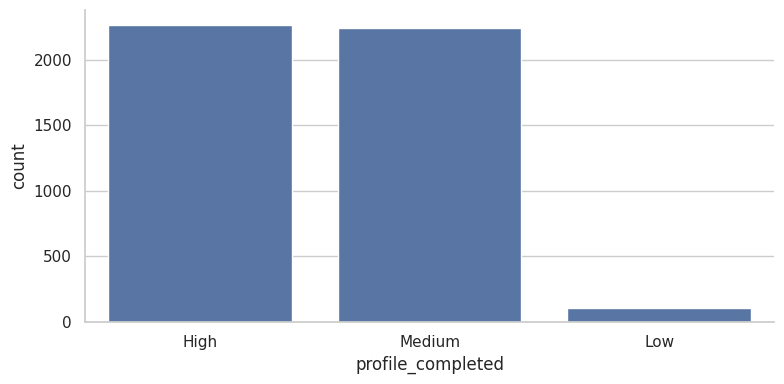

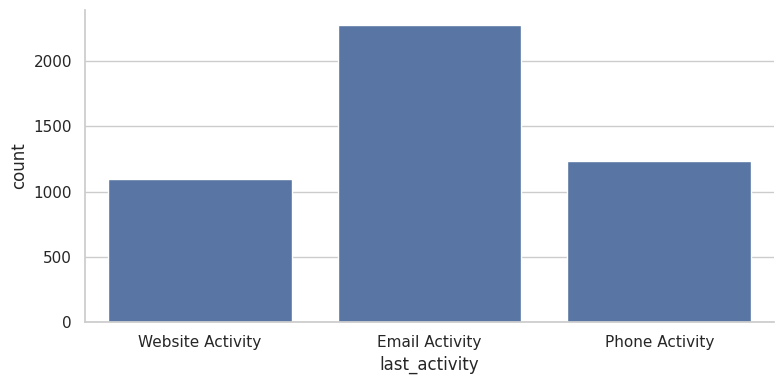

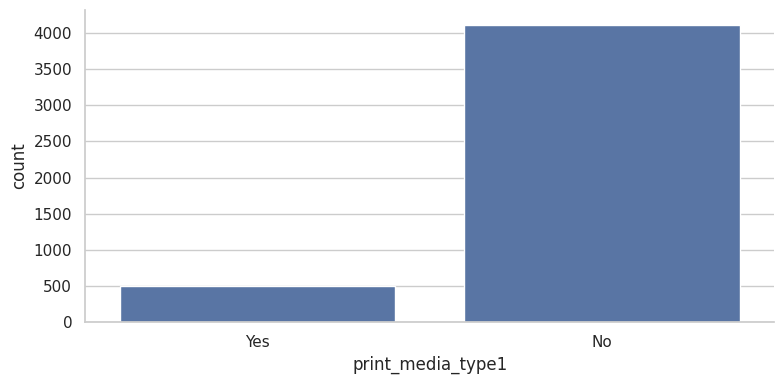

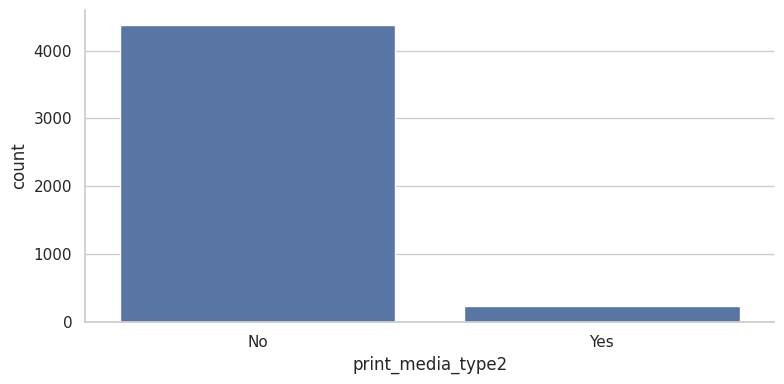

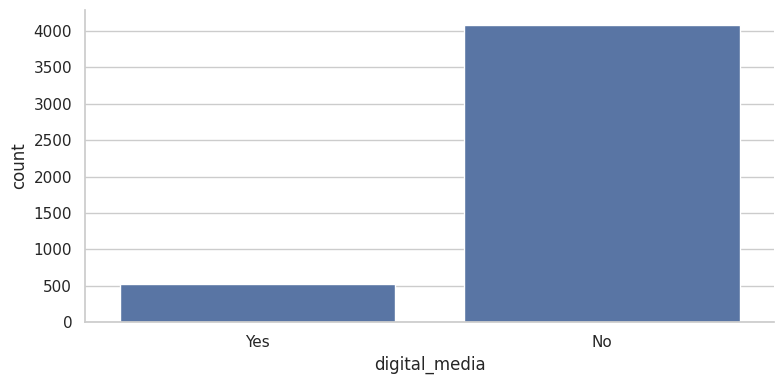

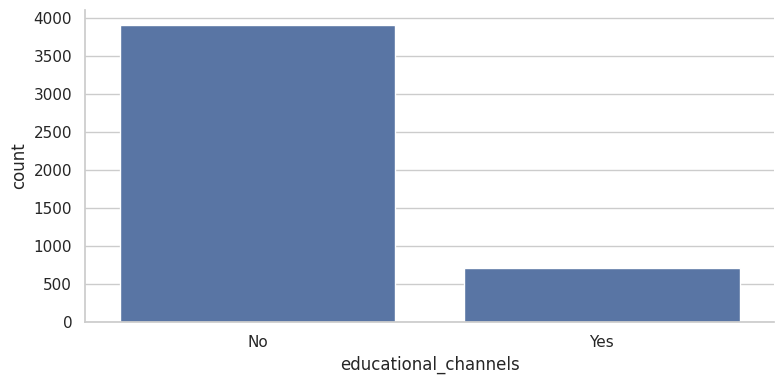

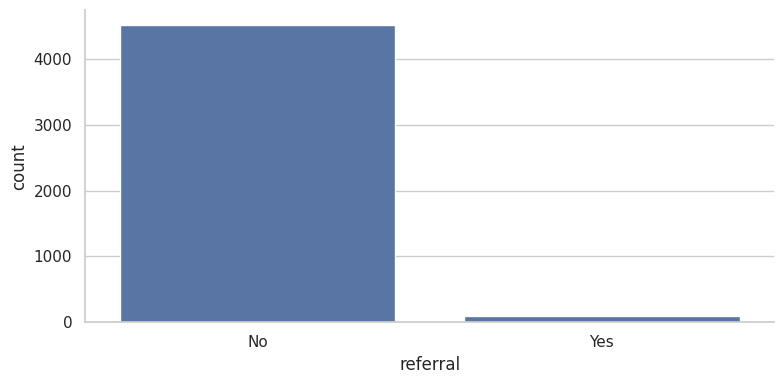

In [18]:
# Identify all categorical columns
obj_cols = data.select_dtypes(include='object').columns

# Loop through each and display countplot
for col in obj_cols:
  plt.figure(figsize=(8, 4))
  sns.countplot(x=col, data=data)
  plt.tight_layout()
  plt.show()

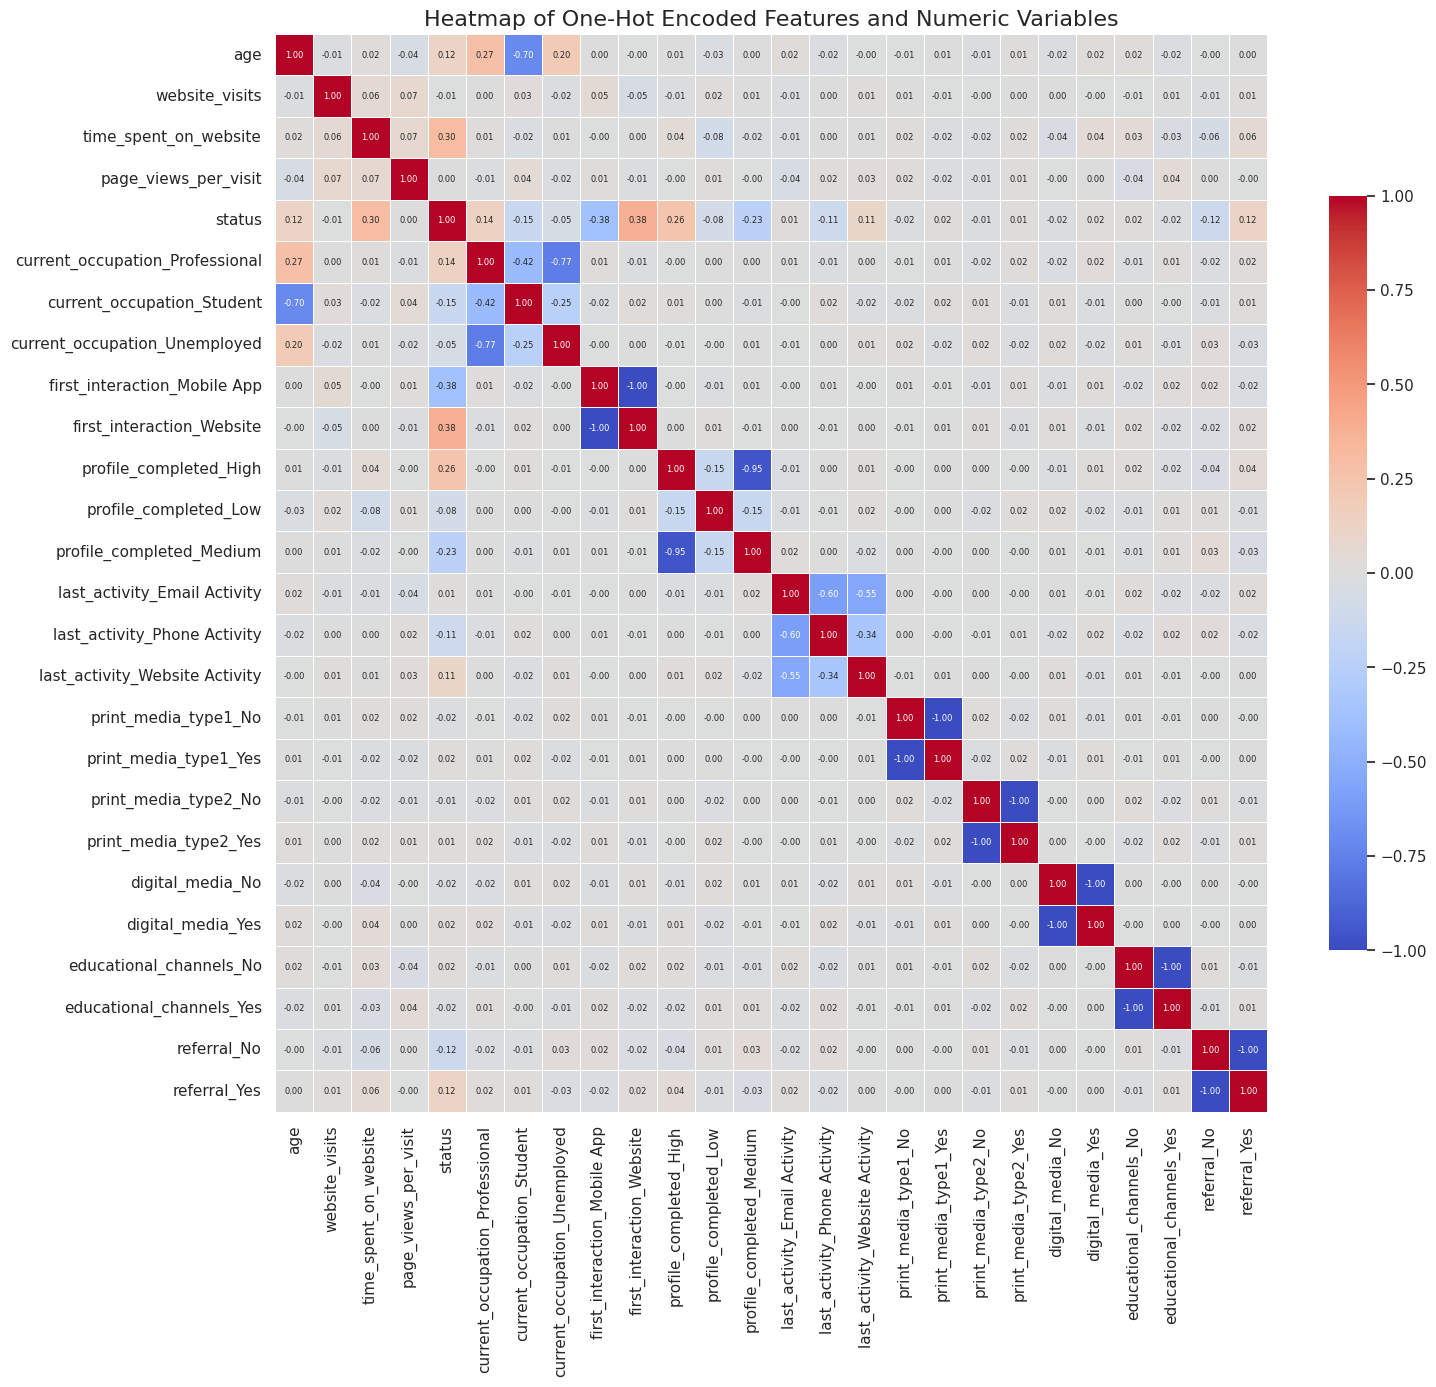

In [19]:
# Expand categorical features into dummy variables so we can compute correlations
data_ohe_noDrop = pd.get_dummies(data, drop_first=False)

# Compute pairwise correlations across all numeric and dummy features
corr_matrix = data_ohe_noDrop.corr()

# Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5,                  # thin lines to delineate cells
    annot=True,                      # show correlation numbers in each cell
    fmt=".2f",                       # format numbers to two decimal places for readability
    annot_kws={"size": 6},           # small font so numbers don't overlap
    cbar_kws={"shrink": 0.7}         # reduce colorbar size to fit figure
)
plt.title("Heatmap of One-Hot Encoded Features and Numeric Variables", fontsize=16)
plt.show()


**Observations:**
- Leads that had their first interaction through the mobile app were **less likely** to convert, conversely leads with a first interaction through the website were **more likely** to convert
- Profiles with a high level of completion were more likely to convert to paid customers whereas profiles with a medium level of completion did not
- Leads that had the current occupation label of 'professional' were a little more likely to convert to a paid customer
- The majority of profiles seem to be in their late 50s
- The majority of profiles seem to be in the 'Professional' category of current_occupation whereas the 'Student' category has a much smaller amount
- The number of profiles in the 'Low' category of profile_completed seem to be much smaller than 'High' or 'Medium'
- There is a visible class imbalance in the 'print_media_typ', 'digital_media', 'educational_channels', 'refferal', and 'status'

## **Data Pre-Processing**

In [20]:
# One hot encode the categorical columns
data_ohe = pd.get_dummies(data, drop_first=False)

# Dropping certain columns to avoid multicollinearity (dropping custom columns for better interpretability of feature importance later on)
data_ohe.drop(columns=['current_occupation_Unemployed', 'first_interaction_Mobile App', 'profile_completed_Low', 'last_activity_Email Activity', 'print_media_type1_No', 'print_media_type2_No', 'digital_media_No', 'educational_channels_No', 'referral_No'], inplace=True)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4612 non-null   int64  
 1   website_visits                   4612 non-null   int64  
 2   time_spent_on_website            4612 non-null   int64  
 3   page_views_per_visit             4612 non-null   float64
 4   status                           4612 non-null   int64  
 5   current_occupation_Professional  4612 non-null   bool   
 6   current_occupation_Student       4612 non-null   bool   
 7   first_interaction_Website        4612 non-null   bool   
 8   profile_completed_High           4612 non-null   bool   
 9   profile_completed_Medium         4612 non-null   bool   
 10  last_activity_Phone Activity     4612 non-null   bool   
 11  last_activity_Website Activity   4612 non-null   bool   
 12  print_media_type1_Ye

In [21]:
# Choose which dataset to build model with
selected_data = data_ohe

# Seperating the independent variable (X) and dependent variable (Y)
X = data_ohe.drop(["status"], axis=1)
y = data_ohe["status"]

# Splitting the data into 75% training and 25% test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

In [22]:
y.value_counts()

,count
status,
0,3235
1,1377


In [23]:
from sklearn.metrics import confusion_matrix, precision_recall_curve

def display_confusion_matrix(y_pred):
  # Compute matrix of true vs. predicted labels
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5,4))
  sns.heatmap(
      cm,
      annot=True,
      fmt="d",                                    # show raw counts as integers
      cbar=False,                                 # hide colorbar to keep focus on values
      xticklabels=['Not Converted', 'Converted'], # label axes for stakeholders
      yticklabels=['Not Converted', 'Converted']
  )
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()


def display_PR_curve(model):
  # Get predicted probabilities for the positive class (needed to compute precision/recall)
  y_scores = model.predict_proba(X_test)[:,1]

  # Compute precision and recall values across different probability thresholds
  precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

  # Plot the precision-recall curve
  plt.figure(figsize=(8,6))
  plt.plot(recall, precision, marker='.', label='Logistic Regression') # recall on x, precision on y
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.grid(True)
  plt.legend()
  plt.show()

## **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scale features then train a logistic regression model
LR_model = make_pipeline(
    StandardScaler(),               # standardize features so the solver converges efficiently
    LogisticRegression(
        max_iter=1000,
        class_weight='balanced',    # auto adjust weights to counter class imbalance
        random_state=1
    )
)

# Train on training set
LR_model.fit(X_train, y_train)

# Predict on test set
y_pred = LR_model.predict(X_test)

# Output performance metrics
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.80      0.86       809
           1       0.64      0.82      0.72       344

    accuracy                           0.81      1153
   macro avg       0.78      0.81      0.79      1153
weighted avg       0.83      0.81      0.81      1153



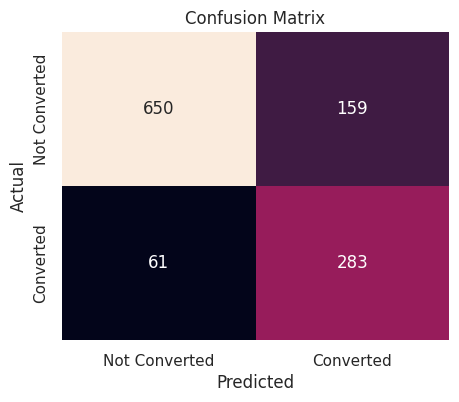

In [25]:
display_confusion_matrix(y_pred)

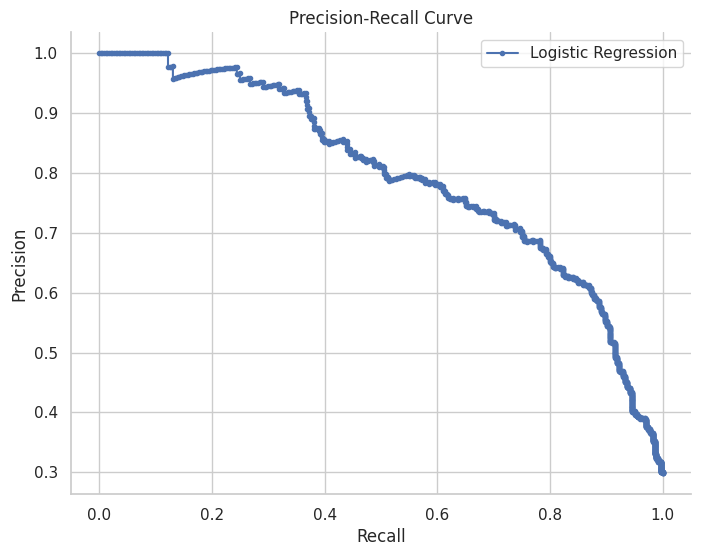

In [26]:
display_PR_curve(LR_model)

## **Support Vector Machine (SVM)**

In [27]:
from sklearn.svm import SVC

# Scale features then fit a non-linear SVM
svm_pipeline = make_pipeline(
    StandardScaler(),             # z-score scaling
    SVC(
        kernel='rbf',             # non linear decision boundary
        class_weight='balanced',
        probability=True,
        random_state=1
    )
)

# Train and evaluate
svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)

# Output performance metrics
print("Classification Report for SVM")
print(classification_report(y_test, y_pred))

Classification Report for SVM
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       809
           1       0.70      0.76      0.73       344

    accuracy                           0.83      1153
   macro avg       0.80      0.81      0.80      1153
weighted avg       0.84      0.83      0.83      1153



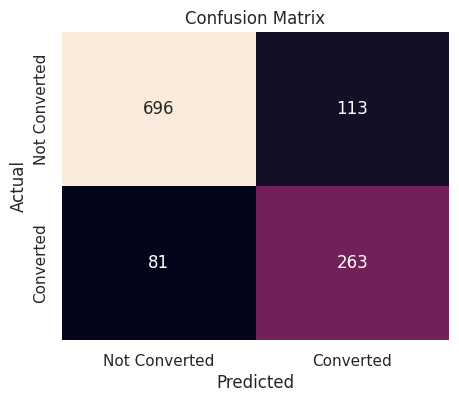

In [28]:
display_confusion_matrix(y_pred)

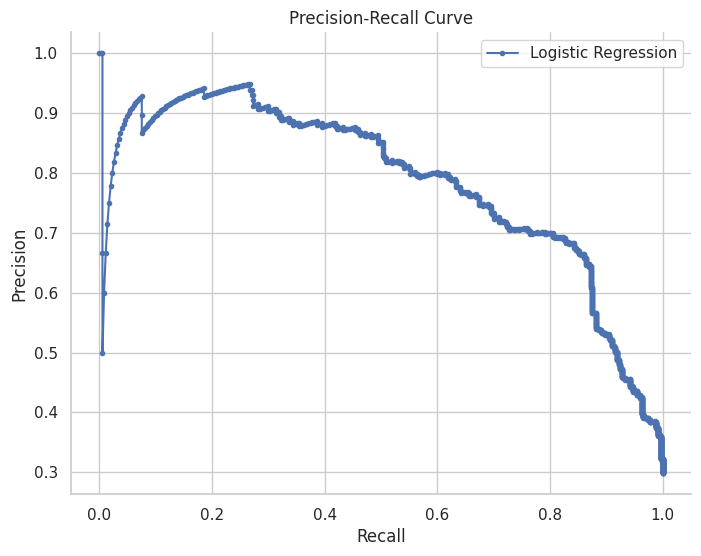

In [29]:
display_PR_curve(svm_pipeline)

## **Decision Tree**

In [30]:
# Fit a decision tree with class balancing
dt_model = make_pipeline(
    DecisionTreeClassifier(
        max_depth=None,
        class_weight='balanced',
        random_state=1
    )
)

# Train and evaluate
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Output performance metrics
print("Classification Report for Decision Tree")
print(classification_report(y_test, y_pred))


Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       809
           1       0.66      0.71      0.68       344

    accuracy                           0.81      1153
   macro avg       0.77      0.78      0.77      1153
weighted avg       0.81      0.81      0.81      1153



In [31]:
from sklearn.model_selection import GridSearchCV

# Grid‑search the best tree depth (maximizing F1 across 5 folds)
dt_pipeline = make_pipeline(
    DecisionTreeClassifier(
        class_weight='balanced',
        random_state=1
    )
)

param_grid = {
    'decisiontreeclassifier__max_depth': [3,4,5,6,8]
}
grid_search = GridSearchCV(
    dt_pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best max depth:", grid_search.best_params_['decisiontreeclassifier__max_depth'])
print(f"Best CV F1-score: {grid_search.best_score_:.3f}")

Best max depth: 5
Best CV F1-score: 0.757


In [32]:
dt_model = grid_search.best_estimator_.named_steps['decisiontreeclassifier']
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Output performance metrics.
print("Classification Report for Decision Tree")
print(classification_report(y_test, y_pred))


Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       809
           1       0.68      0.86      0.76       344

    accuracy                           0.84      1153
   macro avg       0.81      0.85      0.82      1153
weighted avg       0.86      0.84      0.84      1153



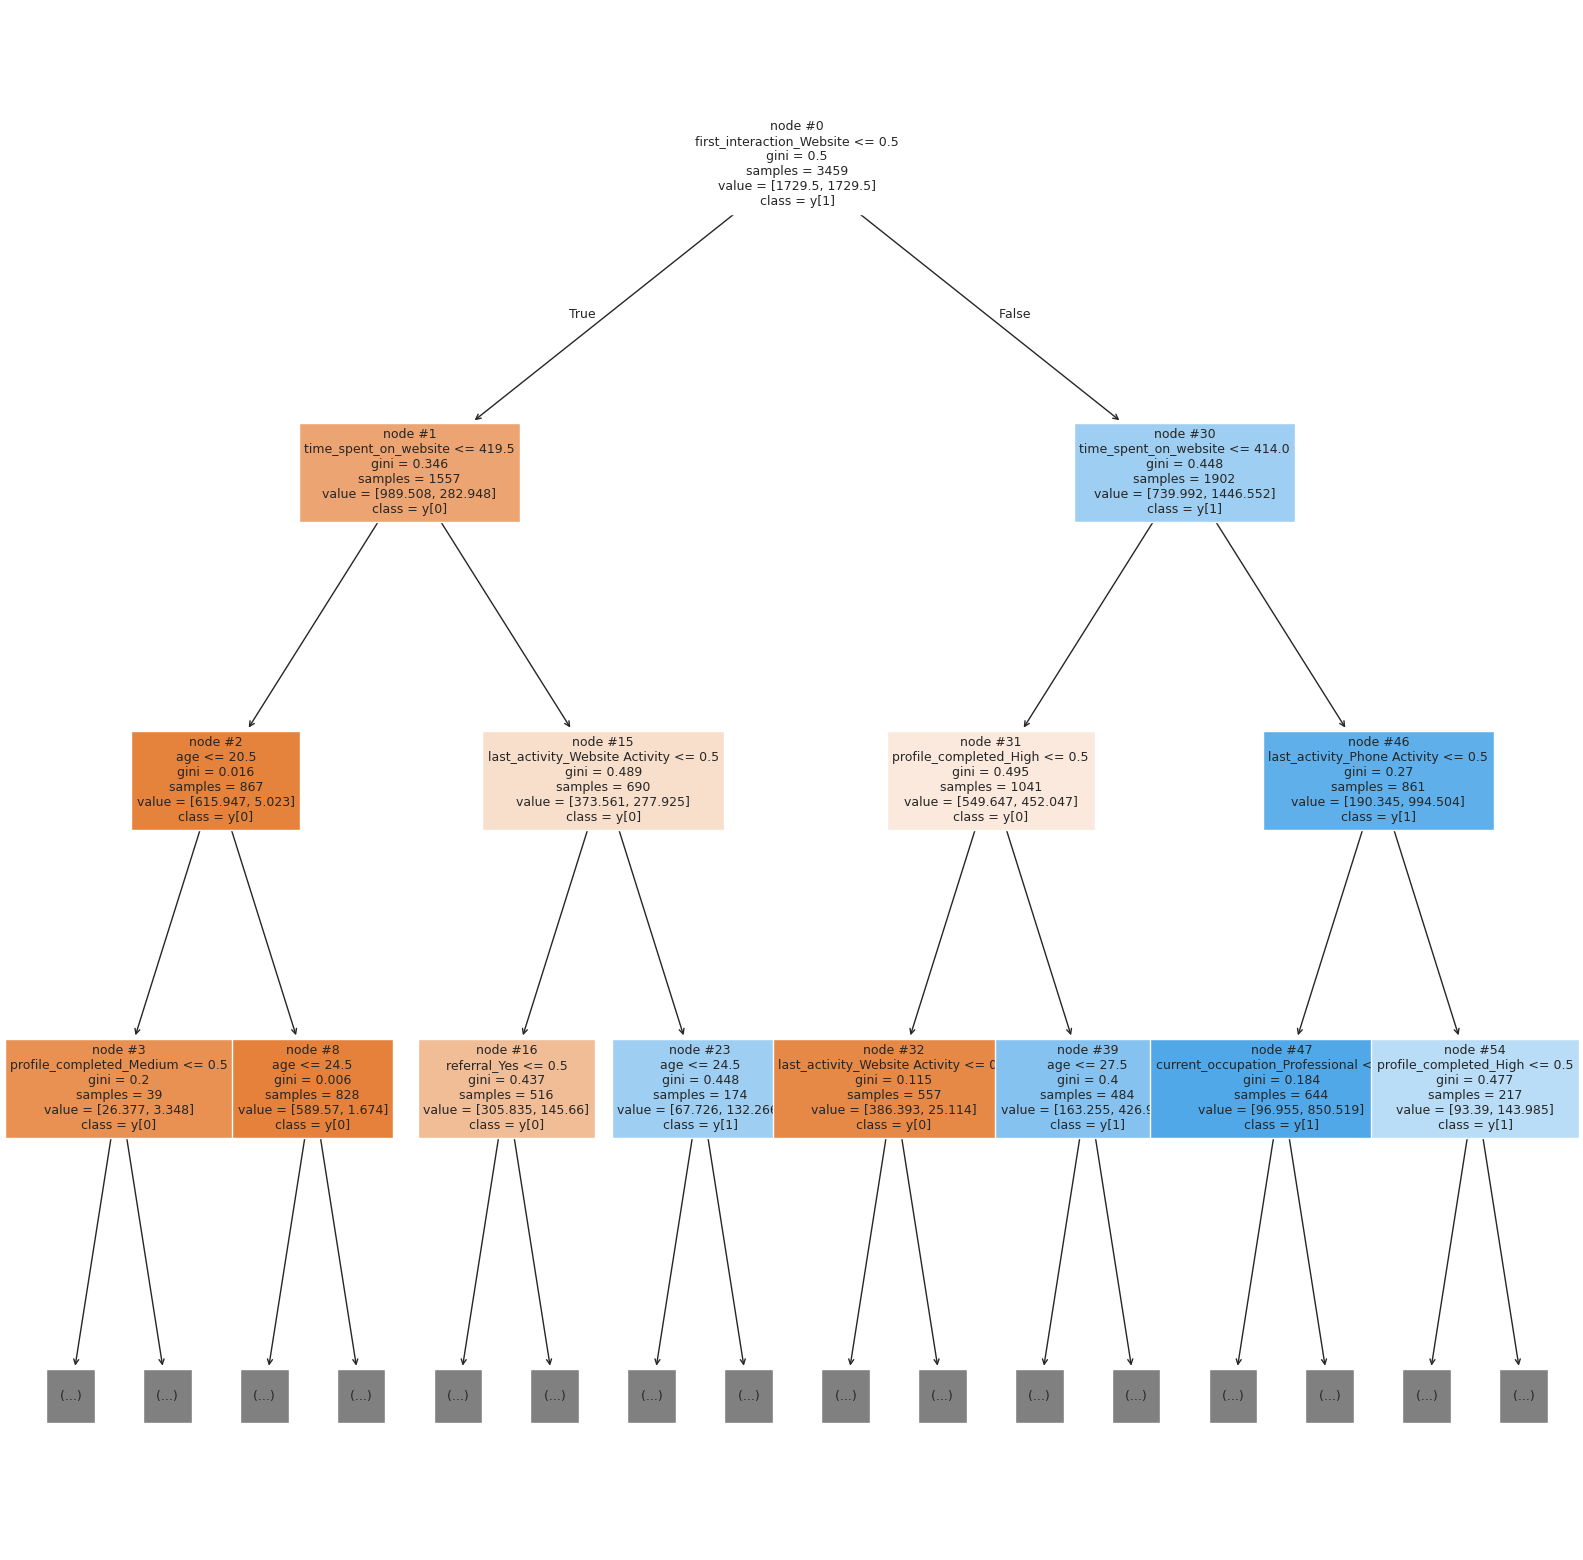

In [33]:
from sklearn import tree

features = list(X_train.columns)

plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, feature_names=features, max_depth=3, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

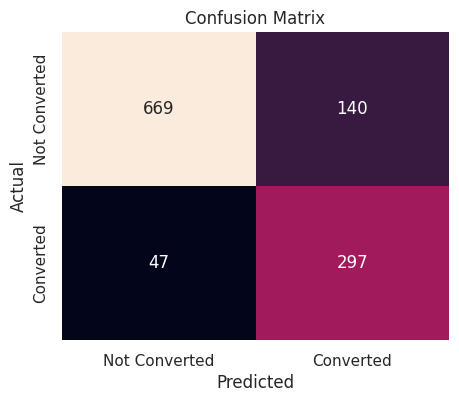

In [34]:
display_confusion_matrix(y_pred)

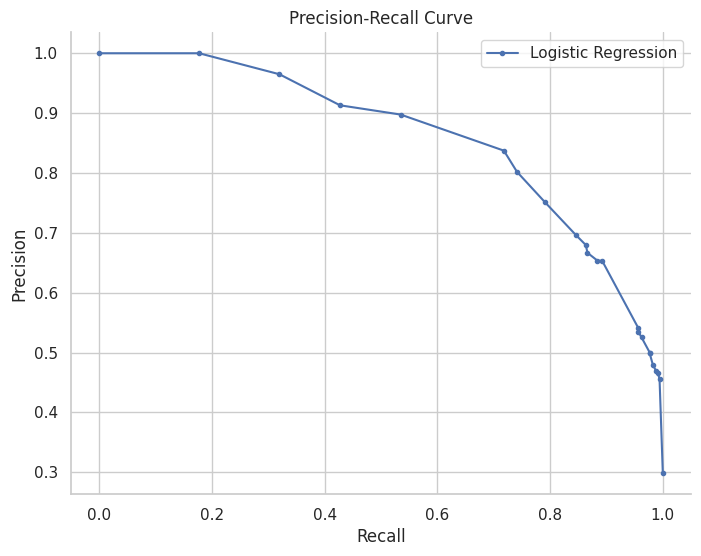

In [35]:
display_PR_curve(dt_model)

## **Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

# Random Forest Classifier Pipeline
rf_pipeline = make_pipeline(
    RandomForestClassifier(
        class_weight='balanced',
        random_state=1
    )
)

# Hyperparamter grid to explore
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

# Single stratified split
single_split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.25,
    random_state=1
)

grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

# Display best hyperparameters and CV precision
print("Best params:", grid_rf.best_params_)
print("Best CV F1-score:", grid_rf.best_score_)

# Predict on test set and output performance metrics
y_pred_rf = best_rf.predict(X_test)
print("Classification Report for Random Forest")
print(classification_report(y_test, y_pred_rf))

Best params: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__n_estimators': 200}
Best CV F1-score: 0.7632364036716628
Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       809
           1       0.73      0.81      0.77       344

    accuracy                           0.86      1153
   macro avg       0.82      0.84      0.83      1153
weighted avg       0.86      0.86      0.86      1153



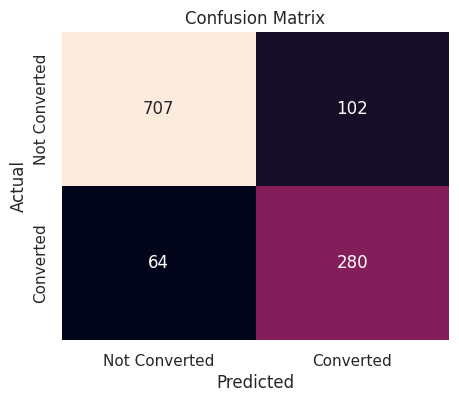

In [37]:
display_confusion_matrix(y_pred_rf)

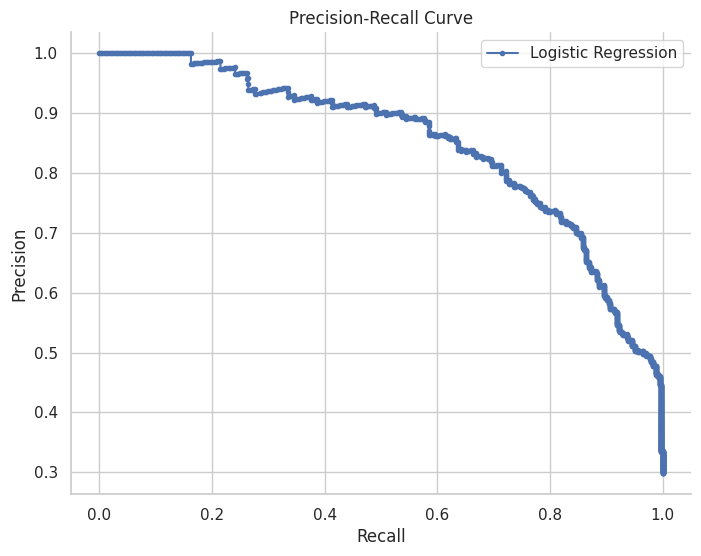

In [38]:
display_PR_curve(best_rf)

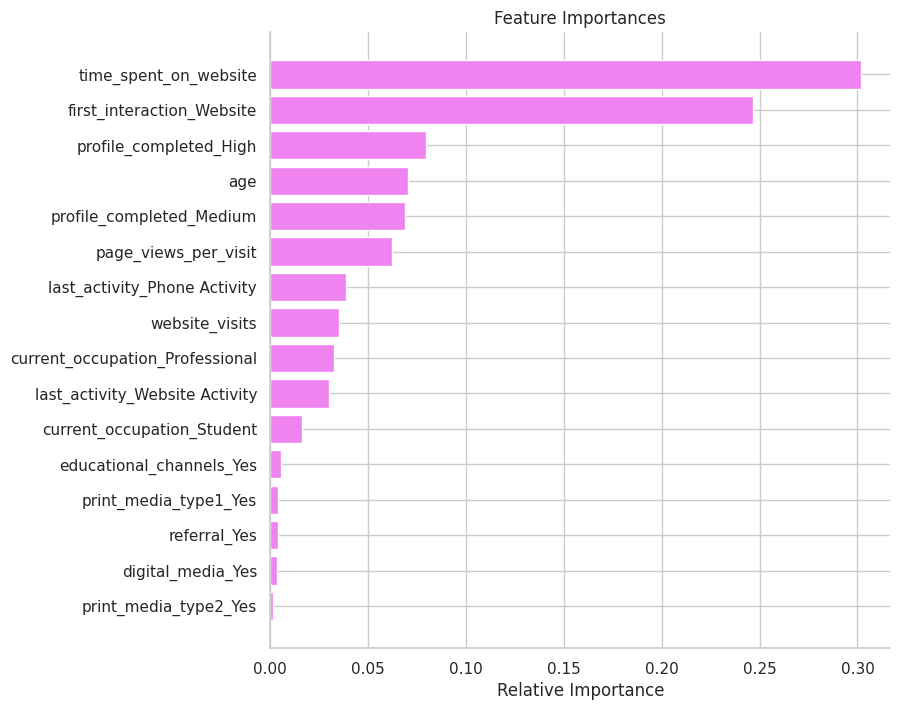

In [39]:
# Importance of features in the tree building
rf = best_rf.named_steps['randomforestclassifier']
feature_names = list(X_train.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

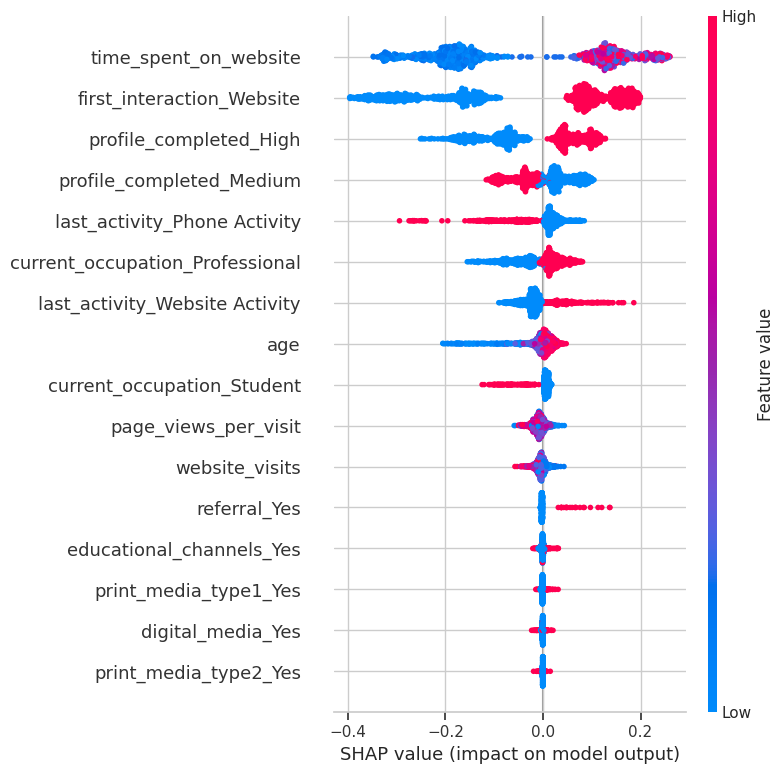

In [41]:
import shap

# Create a SHAP explainer for the fitted RandomForest model
explainer   = shap.TreeExplainer(rf)

# Compute SHAP values for every sample/feature in the test set
shap_values = explainer.shap_values(X_test)

# Isolate SHAP values for the positive class
shap_class1 = shap_values[:, :, 1]

# Beeswarm summary plot
shap.summary_plot(
    shap_class1,          # values to visualize
    X_test,               # original feature matrix for context
    feature_names=X_test.columns
)

## **Actionable Insights and Recommendations**

- **Website engagement is the strongest conversion signal**  
  Leads spending more time and viewing more pages per session are significantly more likely to convert.  
   _Prioritize UX improvements and on-site engagement tactics._

- **First interaction via website outperforms mobile app**  
  Website first leads convert more often than those who start with the mobile app.  
  _Drive traffic to website and look into improving the mobile app._

- **High profile completion indicates strong intent**  
  Users with 75-100% profile completion are far more likely to convert.  
  _Introduce profile completion nudges, progress bars, and incentives._

- **Working professionals are the highest converting segment**  
  Students and unemployed users show lower conversion tendencies.  
  _Tailor messaging for professional upskilling and look into why the other segments are not converting._

- **Phone activity as the last touchpoint reduces conversion odds**  
  Cold calls or SMS as the last contact method correlates with non-conversion.  
  _Might be due to unsolicited calls, eliminate phone activity and look into alternative outreach methods._

- **Traditional media and generic digital ads have minimal impact**  
  Channels like print and broad digital ads contribute little to conversion.  
  _Reduce investment in low ROI channels and focus on retargeting and inbound._

- **Age and page depth slightly improve conversion probability**  
  Older users and those exploring more pages per visit convert more often.  
  _Use demographic filters and behavioral scoring to route high-potential leads._

